<a href="https://colab.research.google.com/github/subhashpolisetti/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction and Visualization on Wine, Breast Cancer, and Digits Datasets

In this notebook, we perform dimensionality reduction using various techniques on three popular datasets: **Wine**, **Breast Cancer**, and **Digits**. The goal is to reduce the high-dimensional feature space into two dimensions for easy visualization while preserving the data's important structure.

## Techniques Covered:
1. **Locally Linear Embedding (LLE)**: A non-linear dimensionality reduction technique that preserves local relationships between data points.
2. **t-SNE**: A non-linear technique for visualizing high-dimensional data by minimizing the divergence between probability distributions in higher and lower dimensions. We use interactive visualization via **Plotly** for better exploration of the data.
3. **ISOMAP**: Captures global structure in the data by approximating geodesic distances between data points.
4. **UMAP**: A fast and scalable technique for non-linear dimensionality reduction that preserves both local and global structures. Visualized interactively using **Plotly**.
5. **MDS (Multidimensional Scaling)**: Preserves pairwise distances between data points when reducing dimensions.
6. **Randomized PCA**: A variant of PCA that uses randomized singular value decomposition for dimensionality reduction.
7. **Kernel PCA**: A non-linear variant of PCA that uses kernel methods to capture complex structures in the data.
8. **Incremental PCA**: A version of PCA suitable for large datasets that processes data in mini-batches.
9. **Factor Analysis**: A method for modeling the variance-covariance structure of the data using latent variables.
10. **Autoencoders**: A neural network-based dimensionality reduction technique where the encoder compresses the data, and the decoder reconstructs the original input.

## Datasets:
- **Wine dataset**: Contains data on chemical properties of wines. Each wine is characterized by 13 features.
- **Breast Cancer dataset**: Contains data from breast cancer biopsies, including 30 features extracted from images of cell nuclei.
- **Digits dataset**: A dataset of 8x8 pixel images of handwritten digits, with 64 features.

## Data Preprocessing:
The datasets are standardized using `StandardScaler` to ensure each feature has zero mean and unit variance. This is important for techniques like PCA and KernelPCA that are sensitive to the scale of features.

## Visualizations:
Each dimensionality reduction technique is applied to the datasets, and the results are visualized in 2D. The visualizations use color-coding to distinguish between different classes in the datasets, allowing us to evaluate how well the techniques preserve the data's structure in lower dimensions.

## Interactive Visualization:
- **Plotly** is used for interactive visualizations of t-SNE and UMAP, allowing you to hover over points and explore the data further.
- **Matplotlib** is used for static visualizations of the other techniques, giving a clear overview of the results.

## Conclusion:
This notebook provides an overview of various dimensionality reduction techniques and their ability to capture important structures in different datasets. The visualizations give insights into how each technique transforms the data and can be used for tasks such as clustering, classification, and anomaly detection.



In [1]:

!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Interactive visualization
import plotly.express as px

# Set visualization aesthetics
sns.set(style="whitegrid")

In [3]:
# Load datasets from sklearn
# Wine dataset: Contains chemical properties of wines with 13 features
wine = datasets.load_wine()

# Breast Cancer dataset: Contains features extracted from breast cancer biopsies
breast_cancer = datasets.load_breast_cancer()

# Digits dataset: A dataset of 8x8 pixel images of handwritten digits with 64 features
digits = datasets.load_digits()

# Convert datasets to DataFrame for easier handling and visualization
# This allows us to have better control over the data and access column names directly
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
bc_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
digits_df = pd.DataFrame(data=digits.data)

# Display the first few rows of each dataset for inspection
# The 'head()' function shows the first 5 rows of the dataset for a quick look at the data
print("Wine dataset:")
print(wine_df.head())  # Display the first 5 rows of the Wine dataset
print("\nBreast Cancer dataset:")
print(bc_df.head())  # Display the first 5 rows of the Breast Cancer dataset
print("\nDigits dataset:")
print(digits_df.head())  # Display the first 5 rows of the Digits dataset

# Normalize datasets to bring features to a common scale
# StandardScaler transforms the data to have zero mean and unit variance
# This is important for techniques like PCA that are sensitive to the scale of features
scaler = StandardScaler()

# Apply StandardScaler to the Wine dataset
wine_scaled = scaler.fit_transform(wine.data)

# Apply StandardScaler to the Breast Cancer dataset
bc_scaled = scaler.fit_transform(breast_cancer.data)

# Apply StandardScaler to the Digits dataset
digits_scaled = scaler.fit_transform(digits.data)


Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0    

#Locally Linear Embedding (LLE):

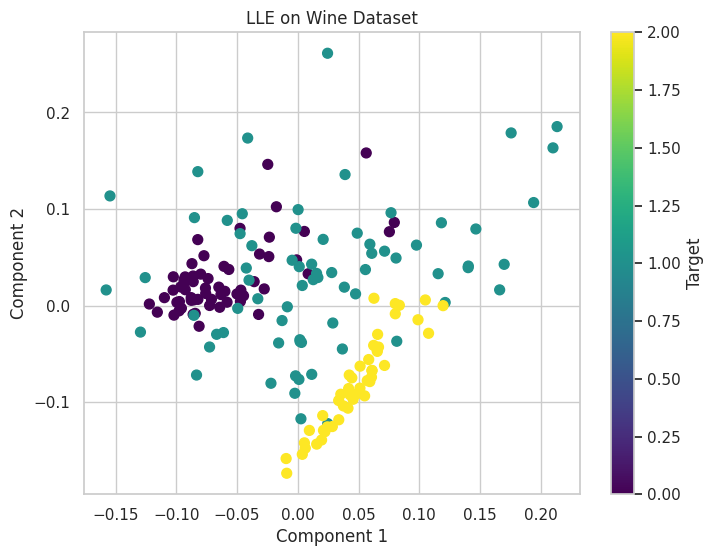

In [4]:
# LLE on Wine dataset
# Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique that preserves local
# structures in the data. It aims to represent each data point as a linear combination of its neighbors.
# LLE is particularly useful for capturing the non-linear manifold structures in high-dimensional data.

# Initialize the LocallyLinearEmbedding model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization.
# n_neighbors=10: The number of neighbors used to compute the local geometry for each point.
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

# Fit the LLE model to the scaled Wine dataset and transform it into a 2D space.
# The result, wine_lle, contains the transformed data in two dimensions.
wine_lle = lle.fit_transform(wine_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (wine classes).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(wine_lle[:, 0], wine_lle[:, 1], c=wine.target, cmap='viridis', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Color bar indicating the target classes (wine types)
plt.title("LLE on Wine Dataset")  # Title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#T-SNE

In [5]:
# t-SNE on Digits dataset
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
digits_tsne = tsne.fit_transform(digits_scaled)

# Interactive visualization using Plotly
fig = px.scatter(
    x=digits_tsne[:, 0],
    y=digits_tsne[:, 1],
    color=digits.target.astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Target'},
    title="t-SNE on Digits Dataset"
)
fig.show()

#ISOMAP

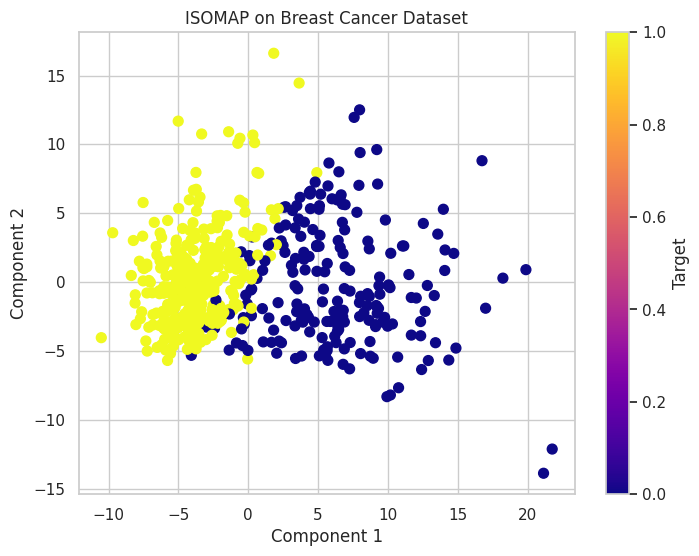

In [6]:
# ISOMAP on Breast Cancer dataset
# ISOMAP (Isometric Mapping) is a non-linear dimensionality reduction technique that preserves global
# geometric structures of the data by computing geodesic distances between points.
# It is useful for capturing data that lies on a non-linear manifold and trying to represent it in lower dimensions.

# Initialize the Isomap model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization.
# n_neighbors=10: This defines the number of neighbors used to compute the local neighborhood for each point.
# A smaller number of neighbors captures more local structure, while a larger number captures broader global structure.
isomap = Isomap(n_components=2, n_neighbors=10)

# Fit the ISOMAP model to the scaled Breast Cancer dataset and transform it into a 2D space.
# The result, bc_isomap, contains the transformed data in two dimensions.
bc_isomap = isomap.fit_transform(bc_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (breast cancer classes).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(bc_isomap[:, 0], bc_isomap[:, 1], c=breast_cancer.target, cmap='plasma', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Color bar indicating the target classes (malignant or benign)
plt.title("ISOMAP on Breast Cancer Dataset")  # Title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#UMAP

In [7]:
# UMAP on Digits dataset
umap_model = umap.UMAP(n_components=2, random_state=42)
digits_umap = umap_model.fit_transform(digits_scaled)

# Interactive visualization
fig = px.scatter(
    x=digits_umap[:, 0],
    y=digits_umap[:, 1],
    color=digits.target.astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Target'},
    title="UMAP on Digits Dataset"
)
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#Multi Dimensional Scaling

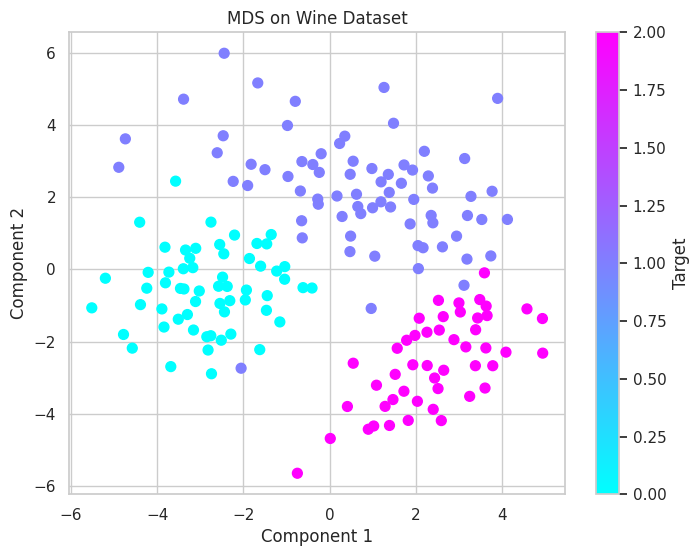

In [8]:
# MDS on Wine dataset
# Multidimensional Scaling (MDS) is a technique used for dimensionality reduction that seeks to preserve
# pairwise distances between points in the lower-dimensional space. It tries to represent the data in such
# a way that the distance between points in the reduced space is as close as possible to the original high-dimensional distance.

# Initialize the MDS model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# random_state=42: This ensures that the results are reproducible by setting a fixed random seed.
mds = MDS(n_components=2, random_state=42)

# Fit the MDS model to the scaled Wine dataset and transform it into a 2D space.
# The result, wine_mds, contains the transformed data, now reduced to two dimensions.
wine_mds = mds.fit_transform(wine_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (wine types).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(wine_mds[:, 0], wine_mds[:, 1], c=wine.target, cmap='cool', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Add a color bar indicating the wine types (target classes)
plt.title("MDS on Wine Dataset")  # Set the title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#Randomized PCA

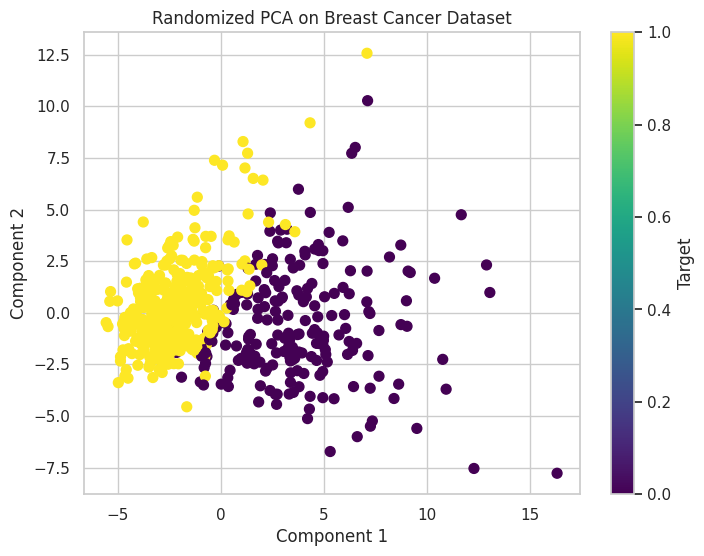

In [9]:
# Randomized PCA on Breast Cancer dataset
# Randomized PCA is a faster approximation to the standard PCA using a randomized SVD solver.
# It is especially useful when dealing with large datasets, as it reduces the computational complexity.
# In this case, we are reducing the dimensionality of the Breast Cancer dataset to 2 components for visualization.

# Initialize the PCA model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# svd_solver='randomized': We use the randomized solver to compute the principal components more efficiently.
# random_state=42: Ensures reproducibility by setting a fixed random seed for the randomization.
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)

# Fit the PCA model to the scaled Breast Cancer dataset and transform it into a 2D space.
# The result, bc_randomized_pca, contains the transformed data in two dimensions.
bc_randomized_pca = randomized_pca.fit_transform(bc_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (malignant or benign).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(bc_randomized_pca[:, 0], bc_randomized_pca[:, 1], c=breast_cancer.target, cmap='viridis', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Add a color bar indicating the target classes (malignant or benign)
plt.title("Randomized PCA on Breast Cancer Dataset")  # Set the title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#Kernel PCA

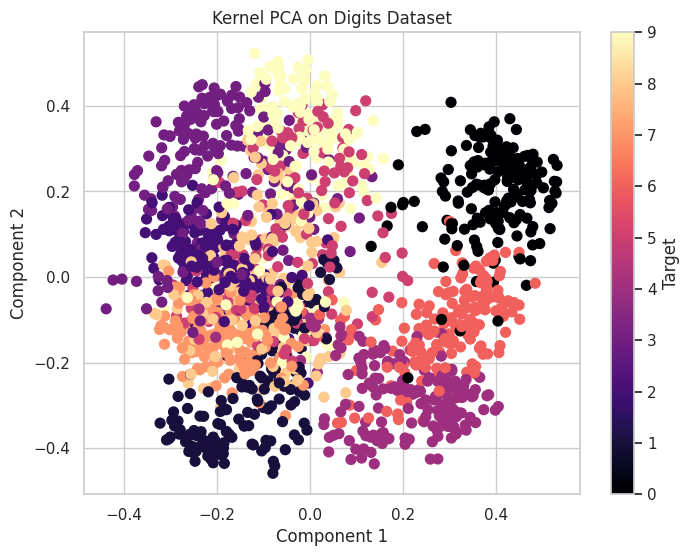

In [10]:
# Kernel PCA on Digits dataset
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
digits_kernel_pca = kernel_pca.fit_transform(digits_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(digits_kernel_pca[:, 0], digits_kernel_pca[:, 1], c=digits.target, cmap='magma', s=50)
plt.colorbar(label="Target")
plt.title("Kernel PCA on Digits Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()




#Incremental PCA

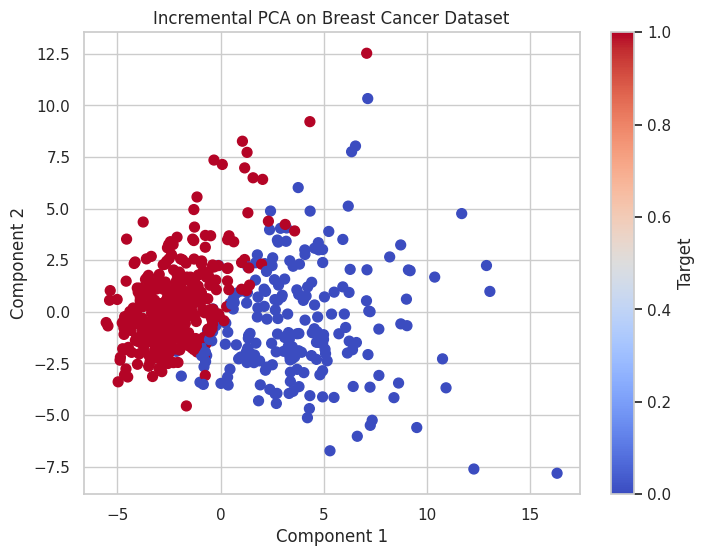

In [11]:
# Incremental PCA on Breast Cancer dataset
# Incremental PCA is a variant of PCA designed to work with large datasets that may not fit into memory.
# It works by processing the data in mini-batches, allowing it to handle large-scale datasets efficiently.

# Initialize the IncrementalPCA model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
incremental_pca = IncrementalPCA(n_components=2)

# Fit the Incremental PCA model to the scaled Breast Cancer dataset and transform it into a 2D space.
# The result, bc_incremental_pca, contains the transformed data in two dimensions.
bc_incremental_pca = incremental_pca.fit_transform(bc_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (malignant or benign).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(bc_incremental_pca[:, 0], bc_incremental_pca[:, 1], c=breast_cancer.target, cmap='coolwarm', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Add a color bar indicating the target classes (malignant or benign)
plt.title("Incremental PCA on Breast Cancer Dataset")  # Set the title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#Factor Analysis

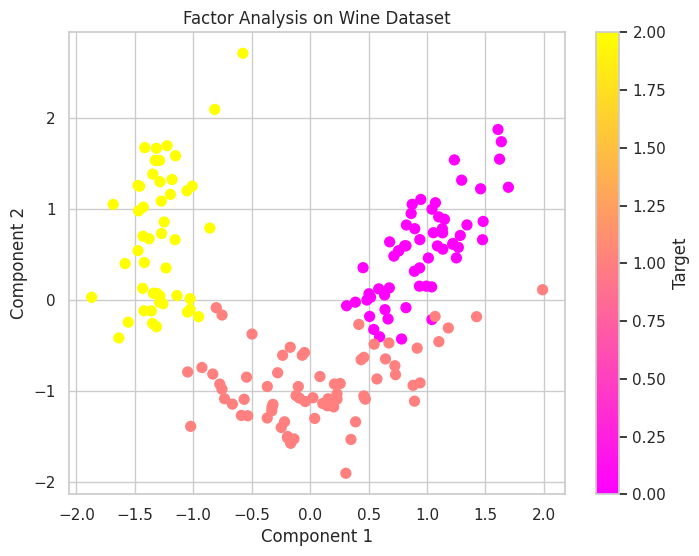

In [12]:
# Factor Analysis on Wine dataset
# Factor Analysis is a statistical technique used to model observed variables in terms of underlying latent variables (factors).
# It aims to explain the variance-covariance structure of the data and is often used when you believe that there are hidden factors influencing the observed data.
# In this case, we apply Factor Analysis to reduce the Wine dataset to two dimensions.

# Initialize the FactorAnalysis model with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# random_state=42: Ensures reproducibility by setting a fixed random seed.
fa = FactorAnalysis(n_components=2, random_state=42)

# Fit the Factor Analysis model to the scaled Wine dataset and transform it into a 2D space.
# The result, wine_fa, contains the transformed data in two dimensions.
wine_fa = fa.fit_transform(wine_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (wine types).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(wine_fa[:, 0], wine_fa[:, 1], c=wine.target, cmap='spring', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Add a color bar indicating the wine types (target classes)
plt.title("Factor Analysis on Wine Dataset")  # Set the title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot


#Auto Encoders

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


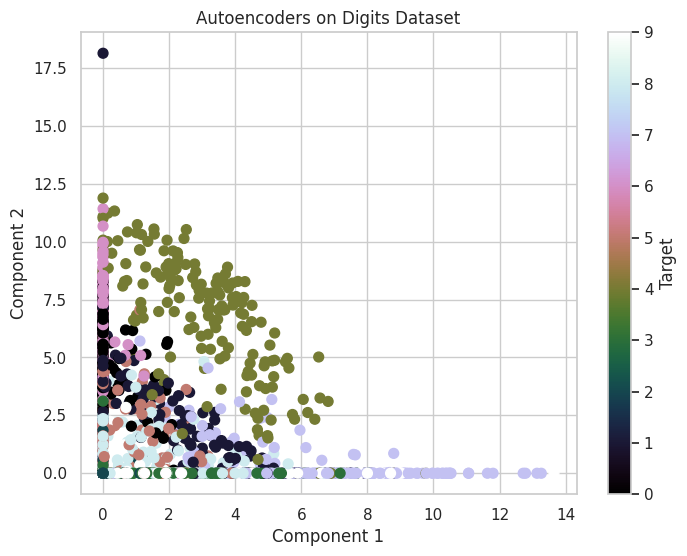

In [13]:
# Autoencoder on Digits dataset
# An autoencoder is a neural network used for unsupervised learning of efficient representations (encoding) of data,
# typically for dimensionality reduction. The autoencoder consists of an encoder that compresses the data into a lower-dimensional representation
# and a decoder that reconstructs the original input from this compressed representation.

# Define the input dimensions (number of features in the Digits dataset)
input_dim = digits_scaled.shape[1]  # The number of features in the Digits dataset (64 features for each image)

# Set the desired encoding (compression) dimension
encoding_dim = 2  # We aim to compress the data to 2 dimensions for visualization

# Build the autoencoder model
# The input layer accepts the data with 'input_dim' features
input_layer = Input(shape=(input_dim,))

# The encoder consists of one Dense layer that reduces the dimensionality to 'encoding_dim' (2 in this case)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# The decoder consists of one Dense layer that reconstructs the data back to its original dimensionality ('input_dim')
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model, which consists of the input layer and the decoder layer
autoencoder = Model(input_layer, decoded)

# The encoder model is a sub-model that takes the input layer and outputs the encoded (compressed) representation
encoder = Model(input_layer, encoded)

# Compile the autoencoder with the Adam optimizer and Mean Squared Error (MSE) loss function
# MSE is commonly used for reconstruction tasks, as it measures the difference between the original and reconstructed data
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on the Digits dataset
# We are using the dataset itself as both the input and the target (as we are reconstructing the data)
# We train the model for 50 epochs with a batch size of 256
autoencoder.fit(digits_scaled, digits_scaled, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Use the encoder model to get the compressed (encoded) 2D representation of the Digits data
digits_autoencoded = encoder.predict(digits_scaled)

# Visualization of the reduced 2D data using Matplotlib
# A scatter plot is created with Component 1 and Component 2 as the x and y axes, respectively.
# The data points are color-coded based on their target values (the digit labels).
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.scatter(digits_autoencoded[:, 0], digits_autoencoded[:, 1], c=digits.target, cmap='cubehelix', s=50)  # Scatter plot with coloring
plt.colorbar(label="Target")  # Add a color bar indicating the digit labels (0-9)
plt.title("Autoencoders on Digits Dataset")  # Set the title for the plot
plt.xlabel("Component 1")  # Label for the x-axis
plt.ylabel("Component 2")  # Label for the y-axis
plt.show()  # Display the plot
